## Starbucks data analyze
* 년, 월별 매장 오픈 개수를 분석하고 결과를 라인 차트로 나타냄

In [14]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
url= 'https://www.starbucks.co.kr/store/getStore.do?r=804IUG79N7'
payload = {
    'in_biz_cds' : '0',
    'in_scodes' : '0',
    'ins_lat' : '37.5627128',
    'ins_lng' : '126.93279869999999',
    'search_text' : '',
    'p_sido_cd' : '01',
    'p_gugun_cd' : '',
    'in_distance' : '0',
    'in_biz_cd' : '',
    'isError' : 'true',
    'searchType' : 'C',
    'set_date' : '',
    'all_store' : '0',
    'T03' : '0',
    'T01' : '0',
    'T12' : '0',
    'T09' : '0',
    'T30' : '0',
    'T05' : '0',
    'T22' : '0',
    'T21' : '0',
    'T10' : '0',
    'T36' : '0',
    'P10' : '0',
    'P50' : '0',
    'P20' : '0',
    'P60' : '0',
    'P30' : '0',
    'P70' : '0',
    'P40' : '0',
    'P80' : '0',
    'whcroad_yn' : '0',
    'P90' : '0',
    'new_bool' : '0',
    'iend' : '1000',
    'rndCod' : 'V8UNZFKU44',}

In [4]:
r = requests.post(url, data=payload)
rt_dict = r.json()
#rt_dict['list']

In [6]:
len(rt_dict['list'])
# 스타벅스의 전체 매장수

577

In [7]:
type(rt_dict)

dict

### 🔍스타벅스 매장이 많이 오픈 된 년, 달은 언제일까?

In [8]:
rt_dict['list'][0]['open_dt'][:-2]

'201906'

In [10]:
month_1 = []
month_2 = []

for i in range(1, len(rt_dict['list'])):
    month_1.append(rt_dict['list'][i]['open_dt'][:-2])
    for j in month_1:
        if j not in month_2:
            month_2.append(j)
#print(month_1)

In [11]:
month_starbucks = {}
for i in month_2:
    month_starbucks[i] = 0
#print(month_starbucks)

In [12]:
for i in range(0,574) :
    for j in month_2:
        if j in rt_dict['list'][i]['open_dt'][-2]:
            month_starbucks[j] += 1
month_starbucks

{'201811': 0,
 '201912': 0,
 '201907': 0,
 '201902': 0,
 '202005': 0,
 '202004': 0,
 '201808': 0,
 '201806': 0,
 '201803': 0,
 '201708': 0,
 '201705': 0,
 '201703': 0,
 '201608': 0,
 '201612': 0,
 '201606': 0,
 '201611': 0,
 '201509': 0,
 '201605': 0,
 '201602': 0,
 '201504': 0,
 '201412': 0,
 '201408': 0,
 '201407': 0,
 '201402': 0,
 '201311': 0,
 '201403': 0,
 '201310': 0,
 '201306': 0,
 '201307': 0,
 '201309': 0,
 '201304': 0,
 '200408': 0,
 '200305': 0,
 '200301': 0,
 '200203': 0,
 '200111': 0,
 '200103': 0,
 '200712': 0,
 '200805': 0,
 '200503': 0,
 '200504': 0,
 '200505': 0,
 '200604': 0,
 '200602': 0,
 '200812': 0,
 '200508': 0,
 '200412': 0,
 '200411': 0,
 '201202': 0,
 '201201': 0,
 '201111': 0,
 '201107': 0,
 '201106': 0,
 '200912': 0,
 '201203': 0,
 '201008': 0,
 '201003': 0,
 '201007': 0,
 '201211': 0,
 '201108': 0,
 '201109': 0,
 '202101': 0,
 '202109': 0,
 '202011': 0,
 '202107': 0,
 '202106': 0,
 '202104': 0,
 '202010': 0,
 '202112': 0,
 '202108': 0,
 '201610': 0,
 '2015

In [15]:
st_df = pd.DataFrame(month_starbucks, index=[0])

In [16]:
st_df

,201811,201912,201907,201902,202005,202004,201808,201806,201803,201708,...,200310,200807,201102,201105,201812,200905,200406,201701,200104,200701
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
st_sort=st_df.columns.tolist()

In [18]:
st_sort.sort()

In [19]:
st_df = st_df[st_sort]

In [20]:
st_df

,199907,200010,200103,200104,200108,200111,200112,200201,200202,200203,...,202107,202108,202109,202110,202111,202112,202201,202202,202203,202204
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* chart 그리기

* 한글 font 지정

In [114]:
from matplotlib import font_manager, rc

font_path='D:/20220103_lab/14.python/source/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

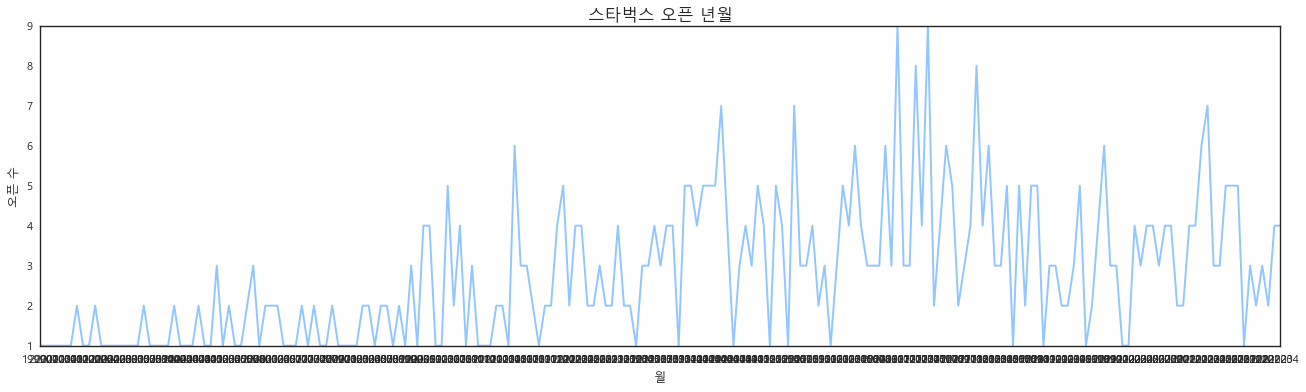

In [180]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-pastel')
plt.title("스타벅스 오픈 년월", fontsize=15) 
plt.xlabel("월")
plt.ylabel("오픈 수")
plt.plot(st_df.loc[0].index, st_df.loc[0].values)

plt.show()

### 🔍스타벅스 매장이 많이 오픈 된 달은 언제일까?

In [140]:
rt_dict['list'][0]['open_dt'][4:-2]

'06'

In [143]:
st_m = []
st_m2= []

for x in range(1, len(rt_dict['list'])):
    st_m.append(rt_dict['list'][x]['open_dt'][4:-2])
    for y in st_m:
        if y not in st_m2:
            st_m2.append(y)
print(st_m2)

['11', '12', '07', '02', '05', '04', '08', '06', '03', '09', '10', '01']


In [144]:
st_sort = {}
for x in st_m2:
    st_sort[x] = 0
print(st_sort)

{'11': 0, '12': 0, '07': 0, '02': 0, '05': 0, '04': 0, '08': 0, '06': 0, '03': 0, '09': 0, '10': 0, '01': 0}


In [146]:
for x in range(0,574) :
    for y in st_m2:
        if y in rt_dict['list'][x]['open_dt'][4:-2]:
            st_sort[y] += 1
st_sort

{'11': 37,
 '12': 50,
 '07': 48,
 '02': 39,
 '05': 48,
 '04': 52,
 '08': 47,
 '06': 48,
 '03': 62,
 '09': 51,
 '10': 47,
 '01': 45}

In [148]:
st_sort_df = pd.DataFrame(st_sort, index=[0])

In [149]:
st_sort_df

,11,12,07,02,05,04,08,06,03,09,10,01
0,37,50,48,39,48,52,47,48,62,51,47,45


In [155]:
st_sort_df.iloc[:, 0]

0    37
Name: 11, dtype: int64

In [156]:
st_sort_df.iloc[0]

11    37
12    50
07    48
02    39
05    48
04    52
08    47
06    48
03    62
09    51
10    47
01    45
Name: 0, dtype: int64

In [157]:
st_sort_df.iloc[0].index

Index(['11', '12', '07', '02', '05', '04', '08', '06', '03', '09', '10', '01'], dtype='object')

In [158]:
st_sort_df.iloc[0].values

array([37, 50, 48, 39, 48, 52, 47, 48, 62, 51, 47, 45], dtype=int64)

In [175]:
from matplotlib import font_manager, rc

font_path='D:/20220103_lab/14.python/source/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

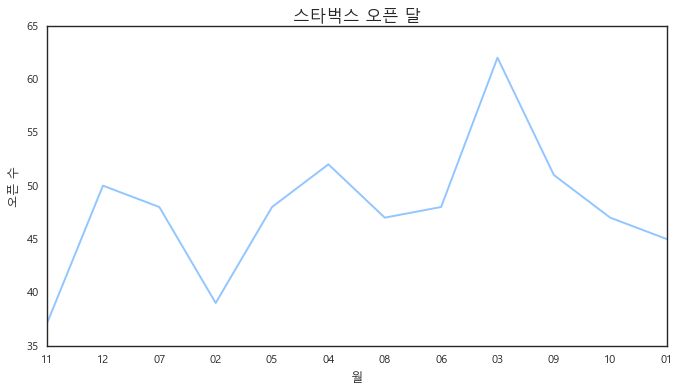

In [176]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-pastel')
plt.title("스타벅스 오픈 달", fontsize=15) 
plt.xlabel("월")
plt.ylabel("오픈 수")
plt.plot(st_sort_df.iloc[0].index, st_sort_df.iloc[0].values)

plt.show()